In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from sklearn.utils import shuffle


In [2]:
with h5py.File('C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Desktop/Textile/train64.h5','r') as hdf:
    #ls=list(hdf.keys())
    #print(ls)
    data=hdf.get("images")
    images=np.array(data)

In [3]:
def sigmoid(z):
    return (1.0 / (1 + np.exp(-z)))

In [4]:
def relu(z):
    return np.maximum(z, 0)

In [5]:
def derir(z):
    z[z<0] = 0
    z[z>=0] = 1
    return z

In [6]:
train_df=pd.read_csv('C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Desktop/Textile/train64.csv')

In [7]:
train_df["indication_value"].replace({3: 1, 2: 1,4:1,5:1}, inplace=True)

In [29]:
train_df

,index,angle,indication_type,indication_value,split
0,48000,0,good,0,train
1,48001,80,good,0,train
2,48002,100,good,0,train
3,48003,100,good,0,train
4,48004,0,good,0,train
...,...,...,...,...,...
47995,95995,20,thread,1,train
47996,95996,20,thread,1,train
47997,95997,140,thread,1,train
47998,95998,120,thread,1,train


In [8]:
tlist=[None]*48000

In [9]:
for i in range(0,48000):
    tlist[i]=images[i]

In [10]:
train_df.insert(2, "im", tlist, True)

In [11]:
train_df=train_df[train_df["angle"]==0]

In [12]:
train_df=shuffle(train_df)

In [35]:
train_df

,index,angle,im,indication_type,indication_value,split
9339,57339,0,"[[[0.08319333], [0.07368353], [0.06921137], [0...",color,1,train
17289,65289,0,"[[[0.31196862], [0.30858982], [0.32293686], [0...",cut,1,train
43105,91105,0,"[[[0.46519256], [0.49716118], [0.54279846], [0...",thread,1,train
20084,68084,0,"[[[0.08488274], [0.080693334], [0.08433215], [...",cut,1,train
7006,55006,0,"[[[0.21369137], [0.20918156], [0.22680235], [0...",good,0,train
...,...,...,...,...,...,...
2032,50032,0,"[[[0.19357058], [0.24202824], [0.33004472], [0...",good,0,train
24245,72245,0,"[[[0.51591295], [0.49632], [0.4627451], [0.450...",hole,1,train
2046,50046,0,"[[[0.27838588], [0.2528694], [0.20980746], [0....",good,0,train
5458,53458,0,"[[[0.4538157], [0.43693805], [0.4058404], [0.4...",good,0,train


In [13]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [37]:
train_df

,index,angle,im,indication_type,indication_value,split
0,91163,0,"[[[0.42154235], [0.45266902], [0.47255254], [0...",thread,1,train
1,87074,0,"[[[0.21958509], [0.20950197], [0.21335608], [0...",metal_contamination,5,train
2,80713,0,"[[[0.38594276], [0.35127452], [0.39125606], [0...",metal_contamination,5,train
3,82233,0,"[[[0.37229607], [0.40198705], [0.41403452], [0...",metal_contamination,5,train
4,95662,0,"[[[0.39132354], [0.364691], [0.3330051], [0.33...",thread,1,train
...,...,...,...,...,...,...
6015,76214,0,"[[[0.4761843], [0.5257431], [0.5705549], [0.58...",hole,1,train
6016,78681,0,"[[[0.5266141], [0.51264703], [0.51369566], [0....",hole,1,train
6017,88651,0,"[[[0.38736433], [0.3319643], [0.34628943], [0....",thread,1,train
6018,59797,0,"[[[0.14798588], [0.21931726], [0.22404942], [0...",color,1,train


In [14]:
im_arr=train_df["im"]

In [15]:
im_arr.shape

im_arr=im_arr.tolist()

In [16]:
im_arr=np.concatenate([arr[np.newaxis] for arr in im_arr])

In [17]:
im_arr.shape

(6020, 64, 64, 1)

In [18]:
label=train_df['indication_value']

In [19]:
label=label.to_numpy()

In [20]:
m=label.shape[0]

In [21]:
m

6020

In [22]:
label=label.reshape(1,m)

In [23]:
label

array([[1, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [24]:
num_row=im_arr.shape[0]

In [25]:
num_row

6020

In [26]:
pix=64

In [27]:
im_arr.shape

(6020, 64, 64, 1)

In [28]:
train_xun = im_arr.reshape(im_arr.shape[0],-1).T

In [29]:
train_xun.shape

(4096, 6020)

In [30]:
train_xun = train_xun/255.

In [31]:
#layer sizes
n_x=4096
n_1=5
n_2=5
n_y=1

In [32]:
def initial_params(n_x,n_1,n_2,n_y):
    w1=np.random.rand(n_1,n_x)/100
    b1=np.random.rand(n_1,1)/100
    w2=np.random.rand(n_2,n_1)/100
    b2=np.random.rand(n_2,1)/100
    w3=np.random.rand(n_y,n_2)/100
    b3=np.random.rand(n_y,1)/100
    
    params={"w1":w1,"b1":b1,"w2":w2,"b2":b2,"w3":w3,"b3":b3}
    
    return params

In [33]:
def forward(train_xun,params):
    w1=params["w1"]
    b1=params["b1"]
    w2=params["w2"]
    b2=params["b2"]
    w3=params["w3"]
    b3=params["b3"]
    
    z1 = np.dot(w1,train_xun)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = np.tanh(z2)
    z3 = np.dot(w3,a2)+b3
    a3 = sigmoid(z3)
    
    vals={"z1":z1,"a1":a1,"z2":z2,"a2":a2,"z3":z3,"a3":a3}
    
    return a3,vals

In [34]:
def cost(a3,label,m):
    log = np.multiply(label,np.log(a3))+np.multiply(1-label,np.log(1-a3))
    cost = - np.sum(log)/m
    cost = float(np.squeeze(cost))
    return cost
    

In [35]:
def backprop(params,vals,train_xun,label,m):
    w1 = params["w1"]
    w2 = params["w2"]
    w3 = params["w3"]
        
    a1 = vals["a1"]
    a2 = vals["a2"]
    a3 = vals["a3"]
    
    z1 = vals["z1"]
    z2 = vals["z2"]
    z3 = vals["z3"]
    
    dz3 = (a3-label)
    dw3 = (1/m)*np.dot(dz3,np.transpose(a2))
    db3 = (1/m)*np.sum(dz3, axis = 1, keepdims=True)
    
    dz2 = np.multiply(np.dot(np.transpose(w3),dz3),(1-np.square(a2)))
    dw2 = (1/m)*np.dot(dz2,np.transpose(a1))
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims=True)
    
    dz1 = np.multiply(np.dot(np.transpose(w2),dz2),(1-np.square(a1)))
    dw1 = (1/m)*np.dot(dz1,np.transpose(train_xun))
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims=True)
    
    upds  = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2,
             "dw3": dw3,
             "db3": db3}
    
    return upds

In [36]:
def update(params,upds,learn_rate):
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    w3 = params["w3"]
    b3 = params["b3"]

    dw1 = upds["dw1"]
    db1 = upds["db1"]
    dw2 = upds["dw2"]
    db2 = upds["db2"]
    dw3 = upds["dw3"]
    db3 = upds["db3"]
    
    w1 = w1-(learn_rate*dw1)
    b1 = b1-(learn_rate*db1)
    w2 = w2-(learn_rate*dw2)
    b2 = b2-(learn_rate*db2)
    w3 = w3-(learn_rate*dw3)
    b3 = b3-(learn_rate*db3)
    
    params={"w1":w1,"b1":b1,"w2":w2,"b2":b2,"w3":w3,"b3":b3}
    
    return params

In [37]:
def nnetwork(n_x, n_1, n_2, n_y, train_xun ,label ,num_iter, learn_rate ,start=False):
    params=initial_params(n_x,n_1,n_2,n_y)
    
    for i in range(0,num_iter):
        a3,vals=forward(train_xun,params)
        
        costs=cost(a3,label,m)
        
        upds=backprop(params,vals,train_xun,label,m)
        
        params=update(params,upds,learn_rate)
        
        if start and i % 100 == 0:
            print ("Cost after iteration {}: {}" .format(i, costs))
    return params

In [38]:
params=nnetwork(n_x,n_1,n_2,n_y,train_xun,label,1000,2,start=True)

Cost after iteration 0: 0.6909587637992197
Cost after iteration 100: 0.4565709433331416
Cost after iteration 200: 0.45657070934801003
Cost after iteration 300: 0.45657050721154374
Cost after iteration 400: 0.4565703177100441
Cost after iteration 500: 0.4565701228517371
Cost after iteration 600: 0.45656990413202847
Cost after iteration 700: 0.4565696407461901
Cost after iteration 800: 0.45656930756532427
Cost after iteration 900: 0.45656887266148705


In [39]:
def predict(train_xun,params):
    a3,vals=forward(train_xun,params)
    a=a3.shape[1]
    predictions = np.zeros(a)
    for i in range(0,a):
        if a3[0][i]>0.5:
            predictions[i]=1
        else:
            predictions[i]=0
    
    return predictions
    

In [40]:
predi=predict(train_xun,params)

In [41]:
count=0
for i in range(0,m):
    if label[0][i]==predi[i]:
        count+=1

In [42]:
accuracy=((count/m)*100)
accuracy

82.95681063122925

In [43]:
with h5py.File('C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Desktop/Textile/test64.h5','r') as hdf:
    ls=list(hdf.keys())
    print(ls)
    data=hdf.get("images")
    images=np.array(data)

['images']


In [44]:
test_df=pd.read_csv('C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Desktop/Textile/test64.csv')

In [45]:
test_df["indication_value"].replace({3: 1, 2: 1,4:1,5:1}, inplace=True)

In [46]:
tlist1=[None]*48000

In [47]:
for i in range(0,48000):
    tlist1[i]=images[i]

In [48]:
test_df.insert(2, "im", tlist1, True)

In [49]:
test_df=test_df[test_df["angle"]==0]

In [50]:
test_df=shuffle(test_df)

In [51]:
test_df

,index,angle,im,indication_type,indication_value,split
11636,11636,0,"[[[0.36960077], [0.36288863], [0.33577293], [0...",color,1,test
32345,32345,0,"[[[0.24199843], [0.22490549], [0.21342354], [0...",metal_contamination,1,test
16265,16265,0,"[[[0.2750149], [0.3024659], [0.3489741], [0.41...",cut,1,test
45984,45984,0,"[[[0.57147056], [0.5661275], [0.5781302], [0.5...",thread,1,test
26647,26647,0,"[[[0.20389098], [0.23021097], [0.23585176], [0...",hole,1,test
...,...,...,...,...,...,...
47565,47565,0,"[[[0.37448353], [0.34174982], [0.30563724], [0...",thread,1,test
36716,36716,0,"[[[0.23945294], [0.20054275], [0.16469803], [0...",metal_contamination,1,test
8981,8981,0,"[[[0.26302785], [0.28259805], [0.2947208], [0....",color,1,test
30957,30957,0,"[[[0.12188118], [0.13055764], [0.2047698], [0....",hole,1,test


In [52]:
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [96]:
test_df

,index,angle,im,indication_type,indication_value,split
0,30042,0,"[[[0.4074702], [0.40331843], [0.3879902], [0.4...",hole,1,test
1,46462,0,"[[[0.33387607], [0.34205452], [0.34793332], [0...",thread,1,test
2,18076,0,"[[[0.36667803], [0.42340156], [0.3757992], [0....",cut,1,test
3,21309,0,"[[[0.3749737], [0.31812158], [0.28616863], [0....",cut,1,test
4,42963,0,"[[[0.7189039], [0.71894157], [0.6962604], [0.6...",thread,1,test
...,...,...,...,...,...,...
5997,19868,0,"[[[0.39368784], [0.42287374], [0.42309687], [0...",cut,1,test
5998,18485,0,"[[[0.2700298], [0.30772668], [0.37559175], [0....",cut,1,test
5999,14771,0,"[[[0.4254192], [0.6131039], [0.68203336], [0.6...",color,1,test
6000,20150,0,"[[[0.41733804], [0.4657659], [0.4811843], [0.5...",cut,1,test


In [53]:
im_arr1=test_df["im"]

In [54]:
im_arr1.shape

(6002,)

In [55]:
im_arr1=im_arr1.tolist()

In [56]:
im_arr1=np.concatenate([arr[np.newaxis] for arr in im_arr1])

In [57]:
im_arr1.shape

(6002, 64, 64, 1)

In [58]:
lab=test_df["indication_value"]

In [59]:
lab=lab.to_numpy()

In [60]:
m=lab.shape[0]

In [61]:
lab=lab.reshape(1,m)

In [62]:
test_xun = im_arr1.reshape(im_arr1.shape[0],-1).T

In [63]:
test_xun.shape

(4096, 6002)

In [64]:
finalpredi=predict(test_xun,params)

In [65]:
cnt=0
for i in range(0,m):
    if lab[0][i]==finalpredi[i]:
        cnt+=1

In [66]:
accuracy=((cnt/m)*100)
accuracy

83.33888703765412

In [67]:
testmat=test_xun.reshape(6002,4096)

In [118]:
img=testmat[909]

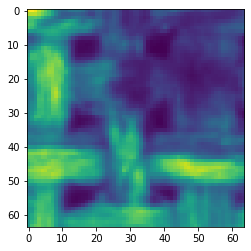

In [119]:
plt.imshow(im_arr1[909])

In [120]:
img=img.reshape(4096,1)

In [121]:
out=predict(img,params)

In [122]:
out

array([1.])